In [1]:
# Packages laden
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Input, Dense
from matplotlib import pyplot as plt
from pandas import DataFrame
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dropout, Activation, Flatten,TimeDistributed, BatchNormalization, LeakyReLU, Activation 
from keras.models import Model
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Laden der Daten
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True)

In [3]:
# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [4]:
ZR = ZR.reshape((len(ZR), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(ZR)
#print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
ZR_N = scaler.transform(ZR)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# Anteil der Datensätze am Gesamtdatensatz
ZR_100=ZR

# Unterteilung der Teildatensätze in Trainings-und Testdaten
ZR_100_TR, ZR_100_TE= ZR_100[0:605], ZR_100[605:len(ZR_100)]

# Anteil der Datensätze am Gesamtdatensatz: normalisierte Daten
ZR_N100=ZR_N

# Unterteilung der Teildatensätze in Trainings-und Testdaten
ZR_N100_TR, ZR_N100_TE= ZR_N100[0:605], ZR_N100[605:len(ZR_N100)]

In [6]:
# Funktion: Datensatz erstellen mit Inputs (look_back: Anzahl der verwendten Vergangenheitswerte) + Output (look_forward: 
# Vorhersagehorizont)
def timeseries_to_supervised_R(data, look_back, look_forward):
    df = DataFrame(data)
    columns = [df.shift(look_forward-1+i) for i in range(1, look_back+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    #df = df.drop(0)
    DF=df[::-1]
    df=DF[:len(df)-(look_back+look_forward-1)]
    DF=df[::-1]
    return DF

In [7]:
# Festlegung: look_back, look_forward + Anwendung der Funktion
# Inputneuronen: 12
# Vorhersagehorizont: t+240
look_back=12
look_forward=240

# Inputgröße 100%
# Trainingsdaten
ZR_100_TR_I=timeseries_to_supervised_R(ZR_100_TR, look_back, look_forward)
trainX_100, train_y_100 = ZR_100_TR_I.iloc[:, 0:-1], ZR_100_TR_I.iloc[:, -1]

# Testdaten 
ZR_100_TE_I=timeseries_to_supervised_R(ZR_100_TE, look_back, look_forward)
testX_100, test_y_100 = ZR_100_TE_I.iloc[:, 0:-1], ZR_100_TE_I.iloc[:, -1]

In [8]:
# Normalisierten Daten
# Inputgröße 100%
# Trainingsdaten
ZR_N100_TR_I=timeseries_to_supervised_R(ZR_N100_TR, look_back, look_forward)
trainX_100N, train_y_100N = ZR_N100_TR_I.iloc[:, 0:-1], ZR_N100_TR_I.iloc[:, -1]

# Testdaten 
ZR_N100_TE_I=timeseries_to_supervised_R(ZR_N100_TE, look_back, look_forward)
testX_100N, test_y_100N = ZR_N100_TE_I.iloc[:, 0:-1], ZR_N100_TE_I.iloc[:, -1]

In [39]:
# Replizierbarkeit gewährleisten
np.random.seed(6)

In [40]:
# Modell zusammenbauen
# Dateninput: 100 %
model = Sequential()
model.add(Dense(10, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_100N, train_y_100N, epochs=200,batch_size=25, verbose=2,validation_data=(testX_100N, test_y_100N))

Train on 354 samples, validate on 7 samples
Epoch 1/200
 - 1s - loss: 0.0230 - val_loss: 0.0281
Epoch 2/200
 - 0s - loss: 0.0225 - val_loss: 0.0298
Epoch 3/200
 - 0s - loss: 0.0219 - val_loss: 0.0281
Epoch 4/200
 - 0s - loss: 0.0218 - val_loss: 0.0280
Epoch 5/200
 - 0s - loss: 0.0216 - val_loss: 0.0254
Epoch 6/200
 - 0s - loss: 0.0214 - val_loss: 0.0240
Epoch 7/200
 - 0s - loss: 0.0213 - val_loss: 0.0224
Epoch 8/200
 - 0s - loss: 0.0212 - val_loss: 0.0209
Epoch 9/200
 - 0s - loss: 0.0214 - val_loss: 0.0213
Epoch 10/200
 - 0s - loss: 0.0211 - val_loss: 0.0196
Epoch 11/200
 - 0s - loss: 0.0213 - val_loss: 0.0197
Epoch 12/200
 - 0s - loss: 0.0212 - val_loss: 0.0193
Epoch 13/200
 - 0s - loss: 0.0211 - val_loss: 0.0171
Epoch 14/200
 - 0s - loss: 0.0209 - val_loss: 0.0171
Epoch 15/200
 - 0s - loss: 0.0208 - val_loss: 0.0166
Epoch 16/200
 - 0s - loss: 0.0207 - val_loss: 0.0181
Epoch 17/200
 - 0s - loss: 0.0208 - val_loss: 0.0149
Epoch 18/200
 - 0s - loss: 0.0208 - val_loss: 0.0166
Epoch 19/20

Epoch 154/200
 - 0s - loss: 0.0177 - val_loss: 0.0089
Epoch 155/200
 - 0s - loss: 0.0178 - val_loss: 0.0100
Epoch 156/200
 - 0s - loss: 0.0177 - val_loss: 0.0089
Epoch 157/200
 - 0s - loss: 0.0177 - val_loss: 0.0092
Epoch 158/200
 - 0s - loss: 0.0177 - val_loss: 0.0099
Epoch 159/200
 - 0s - loss: 0.0177 - val_loss: 0.0093
Epoch 160/200
 - 0s - loss: 0.0177 - val_loss: 0.0086
Epoch 161/200
 - 0s - loss: 0.0176 - val_loss: 0.0092
Epoch 162/200
 - 0s - loss: 0.0178 - val_loss: 0.0097
Epoch 163/200
 - 0s - loss: 0.0176 - val_loss: 0.0082
Epoch 164/200
 - 0s - loss: 0.0175 - val_loss: 0.0093
Epoch 165/200
 - 0s - loss: 0.0175 - val_loss: 0.0094
Epoch 166/200
 - 0s - loss: 0.0176 - val_loss: 0.0090
Epoch 167/200
 - 0s - loss: 0.0175 - val_loss: 0.0086
Epoch 168/200
 - 0s - loss: 0.0175 - val_loss: 0.0091
Epoch 169/200
 - 0s - loss: 0.0174 - val_loss: 0.0086
Epoch 170/200
 - 0s - loss: 0.0174 - val_loss: 0.0093
Epoch 171/200
 - 0s - loss: 0.0175 - val_loss: 0.0094
Epoch 172/200
 - 0s - loss: 

Text(0.5,1,'Loss Curves')

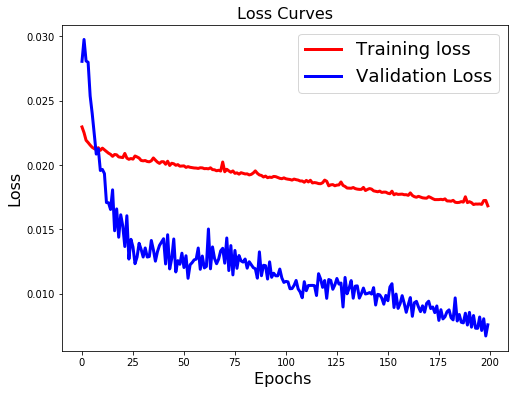

In [41]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [42]:
# Modellperformance bewerten: normalisierte Daten
trainScore = model.evaluate(trainX_100N, train_y_100N, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_100N, test_y_100N, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.02 MSE (0.13 RMSE)
Test Score: 0.01 MSE (0.09 RMSE)


In [43]:
# Vorhersagen generieren
trainPredict_100N = model.predict(trainX_100N)
testPredict_100N = model.predict(testX_100N)

In [44]:
# Re-preprocessing
testPredict_100=scaler.inverse_transform(testPredict_100N)
trainPredict_100=scaler.inverse_transform(trainPredict_100N)

# Evaluation
test_MSE=mean_squared_error(test_y_100,testPredict_100)
train_MSE=mean_squared_error(train_y_100,trainPredict_100)

print(test_MSE,train_MSE)

44650365.70001221 98806309.93489735


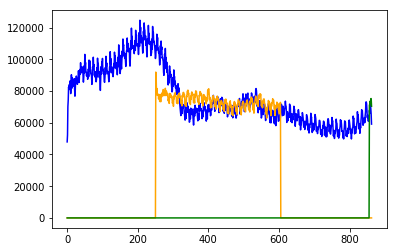

In [45]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_100)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_100))
trainPredictPlot[:]=[0]*len(ZR_100)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_100),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_100)+(look_back+look_forward-1)] = trainPredict_100

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_100)
testPredictPlot=testPredictPlot.reshape(len(ZR_100))
testPredictPlot[:]=[0]*len(ZR_100)
testPredictPlot = testPredictPlot.reshape(len(ZR_100),1)
testPredictPlot[len(trainPredict_100)+(2*look_back+2*look_forward-2):len(ZR_100)-(look_back+look_forward-1)+look_back+look_forward] = testPredict_100
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_100, color='blue') 
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()